In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bitcoin_price_Training - Training.csv')

In [3]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [5]:
df['Date'].astype('datetime64[ns]')

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

### Handling with str Date column

In [6]:
d = {'Jul': 7, 'Jun':6, 'May':5, 'Apr':4, 'Mar':3, 'Feb':2, 'Jan':1, 'Dec':12, 'Nov':11, 'Oct':10, 'Sep':9, 'Aug':8}

In [7]:
for i,j in d.items():
    df['Date'] = df['Date'].apply(lambda x:x.replace(i,str(j)))

In [8]:
df['Date']

0       7 31, 2017
1       7 30, 2017
2       7 29, 2017
3       7 28, 2017
4       7 27, 2017
           ...    
1551    5 02, 2013
1552    5 01, 2013
1553    4 30, 2013
1554    4 29, 2013
1555    4 28, 2013
Name: Date, Length: 1556, dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%m %d, %Y')

Using other method:

In [10]:
#df['Date'].astype('datetime64[ns]')

Using above code produces similar and shorter result

In [11]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [14]:
df = df.set_index('Date')

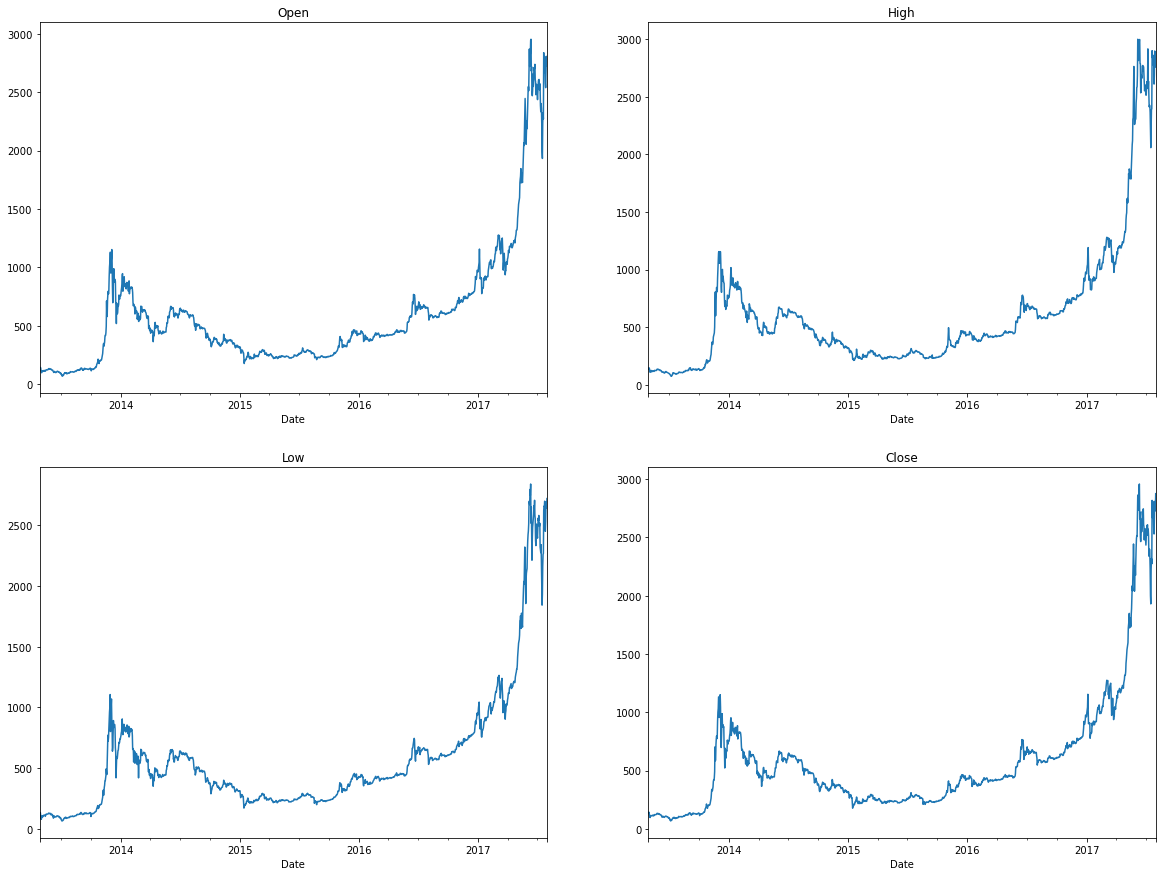

In [15]:
plt.figure(figsize=(20,15))
for i,j in enumerate(df.columns[:4], start=1):
    plt.subplot(2,2,i)
    df[j].plot()
    plt.title(j)

### Anayzing Candlestick Chart with Plotly

In [16]:
import plotly.graph_objects as go

In [17]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

### Analyzing Closing Price in Depth

Text(0.5, 1.0, 'Closing Data w/ Logarithmic Scale')

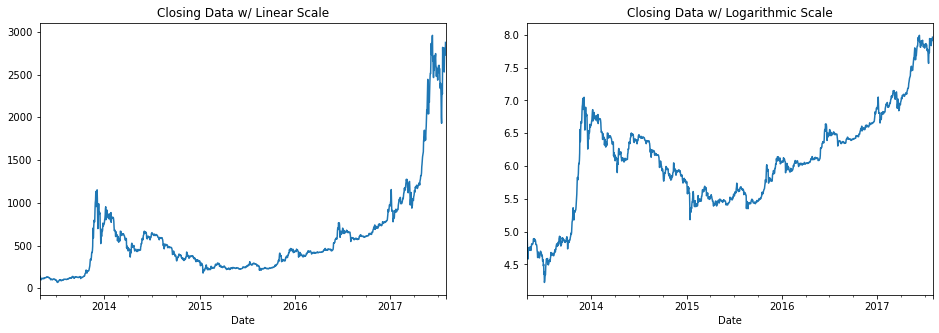

In [18]:
plt.figure(figsize=(16,5))

plt.subplot(121)
df['Close'].plot()
plt.title('Closing Data w/ Linear Scale')

plt.subplot(122)
np.log(df['Close']).plot()
plt.title('Closing Data w/ Logarithmic Scale')

Using logarithmic scale can avoid the outliers in the data

### Analyze the Closing Price on Yearly, Quarterly, and Monthly Basis

Text(0.5, 1.0, 'Yearly Basis')

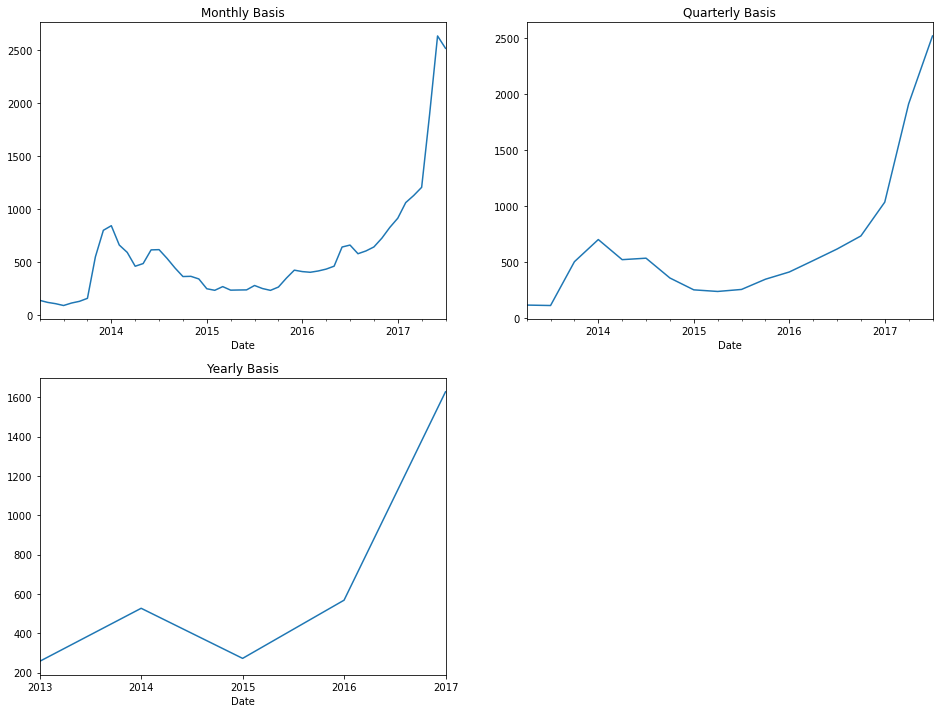

In [20]:
plt.figure(figsize=(16,12))

plt.subplot(221)
df['Close'].resample(rule='M').mean().plot()
plt.title('Monthly Basis')

plt.subplot(222)
df['Close'].resample(rule='Q').mean().plot()
plt.title('Quarterly Basis')

plt.subplot(223)
df['Close'].resample(rule='Y').mean().plot()
plt.title('Yearly Basis')

### Analyzing Daily Change in Closing Stock Price

In [45]:
df['daily_perc'] = (df['Close'] - df['Close'].shift(1))*100/df['Close']

<AxesSubplot:xlabel='Date'>

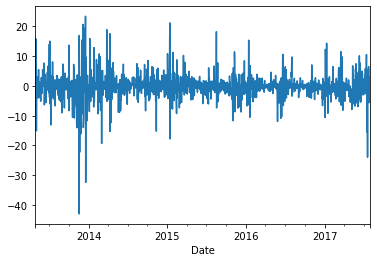

In [46]:
df['daily_perc'].plot()